
## Introduction
In this project, we will explore the application of machine learning, specifically neural networks, for cancer prediction using gene expression data. Cancer is a complex and multifaceted disease, and early detection is crucial for effective treatment and improved patient outcomes. By leveraging gene expression data, we can identify patterns and biomarkers that are indicative of various types of tumors, potentially leading to better diagnostic tools and therapeutic strategies.

### Dataset Description
The dataset used in this project is part of the RNA-Seq (HiSeq) PANCAN data set, which includes gene expression data from patients with different types of tumors: breast cancer (BRCA), kidney renal clear cell carcinoma (KIRC), colon adenocarcinoma (COAD), lung adenocarcinoma (LUAD), and prostate adenocarcinoma (PRAD). The data was donated on June 8, 2016, and is stored in a multivariate format, suitable for tasks such as classification and clustering.

### Key Characteristics:
- Subject Area: Biology 
- Associated Tasks: Classification, Clustering
- Feature Type: Real
- Number of Instances: 801
- Number of Features: 20,531
- Missing Values: None

Each instance (sample) in the dataset corresponds to a patient, with gene expression levels measured by the Illumina HiSeq platform. The attributes are named using a dummy naming convention (gene_XX), consistent with the original submission of the dataset. Detailed probe names and platform specifications can be found on the Synapse website.

### Project Objectives
The primary objective of this project is to build a neural network model capable of predicting the type of tumor based on the gene expression profiles of patients. Therefore the most important metric in this model is **Accuracy**. The steps involved in achieving this objective are as follows:

### Data Preprocessing
Load the dataset and perform initial exploration.
Normalize the gene expression data to ensure that all features contribute equally to the model.
Split the data into training and testing sets.

### Model Development
Design a neural network architecture suitable for high-dimensional gene expression data.
Train the neural network on the training set, optimizing for accuracy and generalization.

### Model Evaluation
Evaluate the trained model on the testing set using accuracy. 

### Results Interpretation and Visualization
Analyze the model's performance and identify the most important genes contributing to the predictions.
Visualize the results using confusion matrices, ROC curves, and other relevant plots.

### Conclusion and Future Work
Summarize the findings and discuss the implications for cancer prediction and potential clinical applications.
Suggest improvements and future directions for further research.

By the end of this project, we aim to demonstrate the potential of neural networks in predicting cancer types from gene expression data, highlighting the importance of machine learning in advancing biomedical research and improving patient care.

Dataset Link = https://archive.ics.uci.edu/dataset/401/gene+expression+cancer+rna+seq

In [1]:
!pip install tensorflow==2.15.0 scikit-learn==1.2.2 matplotlib===3.7.1 seaborn==0.13.1 numpy==1.25.2 pandas==1.5.3 -q --user

In [2]:
# Library for data manipulation and analysis.
import pandas as pd
# Fundamental package for scientific computing.
import numpy as np
#splitting datasets into training and testing sets.
from sklearn.model_selection import train_test_split
#Imports tools for data preprocessing including label encoding, one-hot encoding, and standard scaling
from sklearn.preprocessing import LabelEncoder, OneHotEncoder,StandardScaler
#Imports a class for imputing missing values in datasets.
from sklearn.impute import SimpleImputer
#Imports the Matplotlib library for creating visualizations.
import matplotlib.pyplot as plt
# Imports the Seaborn library for statistical data visualization.
import seaborn as sns
# Time related functions.
import time
#Imports functions for evaluating the performance of machine learning models
from sklearn.metrics import confusion_matrix, f1_score,accuracy_score, recall_score, precision_score, classification_report


#Imports the tensorflow,keras and layers.
import tensorflow
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Dense, Input, Dropout,BatchNormalization
from tensorflow.keras import backend

# to suppress unnecessary warnings
import warnings
warnings.filterwarnings("ignore")

2024-07-13 10:21:04.984193: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [3]:
#Data handling
import pandas as pd
import numpy as np

#Data visualization
import matplotlib.pyplot as plt
import seaborn as sns

#Preprocessing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler

#Classification
import tensorflow as tf
from tensorflow import keras
from keras.models import Sequential
from keras.layers import Dense

#To suppress unnecessary warnings
import warnings
warnings.filterwarnings("ignore")

In [4]:
#Read data directly from a github repository
file_url='https://github.com/AhmedShehata2002/Personal_Projects/raw/main/Data/cancer_gene_expression.zip'
dataframe=pd.read_csv(file_url)

In [5]:
dataframe

,gene_1,gene_2,gene_3,gene_4,gene_5,gene_6,gene_7,gene_8,gene_9,gene_10,...,gene_7992,gene_7993,gene_7994,gene_7995,gene_7996,gene_7997,gene_7998,gene_7999,gene_8000,Cancer_Type
0,0.0,0.000000,0.0,2.088413,0.0,0.0,0.0,0.0,0.550605,2.815760,...,11.558803,8.881802,6.014840,6.643534,11.740624,7.065012,9.932659,6.928584,2.088413,KIRC
1,0.0,0.000000,0.0,3.205955,0.0,0.0,0.0,0.0,0.425244,2.354396,...,11.062829,9.032864,5.054193,6.432320,12.104985,7.300746,9.872796,5.039231,2.448002,KIRC
2,0.0,0.000000,0.0,4.746646,0.0,0.0,0.0,0.0,2.639417,1.657091,...,12.497640,7.198160,0.943434,7.371690,11.202356,8.426588,11.176890,3.119738,4.433988,BRCA
3,0.0,0.000000,0.0,1.173191,0.0,0.0,0.0,0.0,1.527371,2.732899,...,11.261713,8.725676,6.300418,6.036451,11.732303,7.559469,9.596453,2.863046,3.380342,KIRC
4,0.0,0.000000,0.0,1.366532,0.0,0.0,0.0,0.0,0.000000,3.388355,...,12.241965,7.685204,5.142948,6.355788,11.493950,8.139444,10.189256,6.544487,0.839395,COAD
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
796,0.0,2.933384,0.0,1.683921,0.0,0.0,0.0,0.0,0.635336,1.252839,...,9.985842,9.469967,4.225275,6.955336,11.722206,7.309940,10.986119,6.396848,1.252839,BRCA
797,0.0,0.000000,0.0,2.772625,0.0,0.0,0.0,0.0,0.534759,3.761764,...,12.334681,8.157327,1.482797,6.758183,11.403838,9.005347,11.012045,5.386625,1.697640,COAD
798,0.0,0.408277,0.0,1.854754,0.0,0.0,0.0,0.0,0.000000,0.986520,...,11.671992,8.859616,6.393828,6.427115,11.596586,7.454127,10.718533,5.507417,1.398131,BRCA
799,0.0,0.639232,0.0,3.226971,0.0,0.0,0.0,0.0,1.921322,0.639232,...,12.237087,5.753976,4.192478,6.614875,11.183245,7.544261,10.649382,5.282158,0.639232,BRCA


In [6]:
dataframe.head()

,gene_1,gene_2,gene_3,gene_4,gene_5,gene_6,gene_7,gene_8,gene_9,gene_10,...,gene_7992,gene_7993,gene_7994,gene_7995,gene_7996,gene_7997,gene_7998,gene_7999,gene_8000,Cancer_Type
0,0.0,0.0,0.0,2.088413,0.0,0.0,0.0,0.0,0.550605,2.815760,...,11.558803,8.881802,6.014840,6.643534,11.740624,7.065012,9.932659,6.928584,2.088413,KIRC
1,0.0,0.0,0.0,3.205955,0.0,0.0,0.0,0.0,0.425244,2.354396,...,11.062829,9.032864,5.054193,6.432320,12.104985,7.300746,9.872796,5.039231,2.448002,KIRC
2,0.0,0.0,0.0,4.746646,0.0,0.0,0.0,0.0,2.639417,1.657091,...,12.497640,7.198160,0.943434,7.371690,11.202356,8.426588,11.176890,3.119738,4.433988,BRCA
3,0.0,0.0,0.0,1.173191,0.0,0.0,0.0,0.0,1.527371,2.732899,...,11.261713,8.725676,6.300418,6.036451,11.732303,7.559469,9.596453,2.863046,3.380342,KIRC
4,0.0,0.0,0.0,1.366532,0.0,0.0,0.0,0.0,0.000000,3.388355,...,12.241965,7.685204,5.142948,6.355788,11.493950,8.139444,10.189256,6.544487,0.839395,COAD


In [7]:
dataframe.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 801 entries, 0 to 800
Columns: 8001 entries, gene_1 to Cancer_Type
dtypes: float64(8000), object(1)
memory usage: 48.9+ MB


In [8]:
#Let's check for any duplicates in the data
dataframe.duplicated().sum()

0

In [9]:
#Lets check for any missing values in the data 
datanul=dataframe.isnull().sum()
g=[i for i in datanul if i>0]

print('columns with missing values:%d'%len(g))

columns with missing values:0


In [146]:
cancer_type_counts= dataframe['Cancer_Type'].value_counts()
cancer_type_counts

BRCA    300
KIRC    146
LUAD    141
PRAD    136
COAD     78
Name: Cancer_Type, dtype: int64

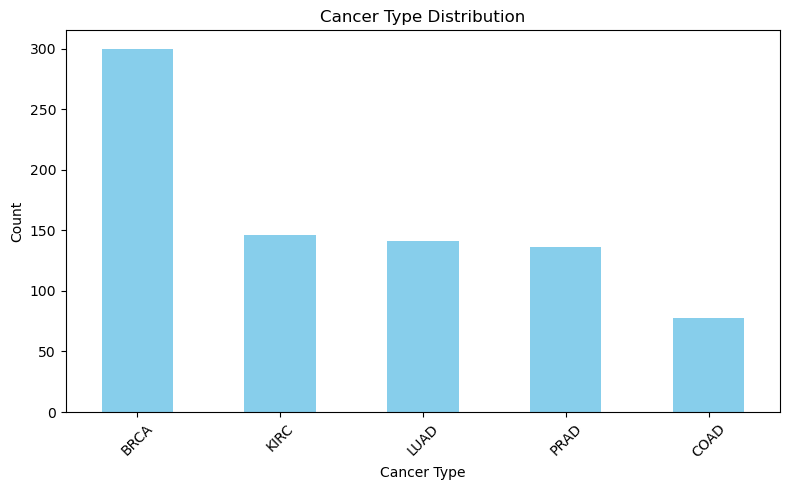

In [147]:
plt.figure(figsize=(8, 5))
cancer_type_counts.plot(kind='bar', color='skyblue')
plt.title('Cancer Type Distribution')
plt.xlabel('Cancer Type')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [11]:
print(dataframe.columns[0:3])

Index(['gene_1', 'gene_2', 'gene_3'], dtype='object')


In [12]:
#Checking the name of the last column
dataframe.columns[-1]

'Cancer_Type'

## Data Preprocessing

Firstly we will have to separate the feature values from the class.  

In [13]:
X=dataframe.iloc[:,0:-1]
y=dataframe.iloc[:,-1]

### Encoding Labels 
Then we will have to encode and change the categorical variables to numerical values. 

In [14]:
label_encoder=LabelEncoder()
label_encoder.fit(y)
y=label_encoder.transform(y)
labels=label_encoder.classes_
classes=np.unique(y)
nclasses=np.unique(y).shape[0]

### Data Splitting 

In [15]:
#Split the data into training and test sets
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2)

#Split the training set into two (training and validation)
X_train, X_val, y_train, y_val = train_test_split(X_train,y_train,test_size=0.2)

### Data Normalisation 

In [16]:
min_max_scaler=MinMaxScaler()
X_train=min_max_scaler.fit_transform(X_train)
X_val=min_max_scaler.fit_transform(X_val)
X_test=min_max_scaler.fit_transform(X_test)

### Neural Network with SGD Optimizer

In [123]:
tf.keras.backend.clear_session()

In [124]:
#Defining the model
model = Sequential()

#Hidden layer 1
model.add(Dense(40, input_dim=X_train.shape[1], activation='relu'))

#Hidden layer 2
model.add(Dense(20, activation='relu'))

#Output layer
model.add(Dense(nclasses, activation='softmax'))

#Define optimizer and learning rate. We will use SDG optimizer
opt_sdg = keras.optimizers.SGD(learning_rate=0.001)

model.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(), optimizer=opt_sdg, metrics=[keras.metrics.SparseCategoricalAccuracy()])

In [125]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 40)                320040    
                                                                 
 dense_1 (Dense)             (None, 20)                820       
                                                                 
 dense_2 (Dense)             (None, 5)                 105       
                                                                 
Total params: 320965 (1.22 MB)
Trainable params: 320965 (1.22 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [126]:
history = model.fit(X_train, y_train, validation_data=(X_val, y_val), batch_size=32,epochs=200, verbose=1)

Epoch 1/200
16/16 [==============================] - 1s 27ms/step - loss: 1.5373 - sparse_categorical_accuracy: 0.3535 - val_loss: 1.4885 - val_sparse_categorical_accuracy: 0.3750
Epoch 2/200
16/16 [==============================] - 0s 14ms/step - loss: 1.4903 - sparse_categorical_accuracy: 0.3730 - val_loss: 1.4655 - val_sparse_categorical_accuracy: 0.3750
Epoch 3/200
16/16 [==============================] - 0s 14ms/step - loss: 1.4699 - sparse_categorical_accuracy: 0.3730 - val_loss: 1.4455 - val_sparse_categorical_accuracy: 0.3750
Epoch 4/200
16/16 [==============================] - 0s 8ms/step - loss: 1.4509 - sparse_categorical_accuracy: 0.3770 - val_loss: 1.4194 - val_sparse_categorical_accuracy: 0.3750
Epoch 5/200
16/16 [==============================] - 0s 4ms/step - loss: 1.4300 - sparse_categorical_accuracy: 0.3809 - val_loss: 1.4058 - val_sparse_categorical_accuracy: 0.3750
Epoch 6/200
16/16 [==============================] - 0s 4ms/step - loss: 1.4084 - sparse_categorical_a

In [127]:
predictions = model.predict(X_test)
accuracy = model.evaluate(X_train, y_test, verbose=0)

6/6 [==============================] - 0s 1ms/step


ValueError: Data cardinality is ambiguous:
  x sizes: 512
  y sizes: 161
Make sure all arrays contain the same number of samples.

In [128]:
#Now we will print the predictions for the first 20 samples in the test set
for index,entry in enumerate(predictions[0:20,:]):
    print('predicted:%d ,actual:%d'%(np.argmax(entry),y_test[index]))

predicted:2 ,actual:2
predicted:3 ,actual:3
predicted:0 ,actual:0
predicted:0 ,actual:0
predicted:3 ,actual:3
predicted:0 ,actual:0
predicted:1 ,actual:1
predicted:2 ,actual:2
predicted:2 ,actual:2
predicted:0 ,actual:0
predicted:0 ,actual:0
predicted:3 ,actual:3
predicted:1 ,actual:1
predicted:2 ,actual:2
predicted:0 ,actual:0
predicted:4 ,actual:4
predicted:4 ,actual:4
predicted:0 ,actual:0
predicted:3 ,actual:3
predicted:0 ,actual:0


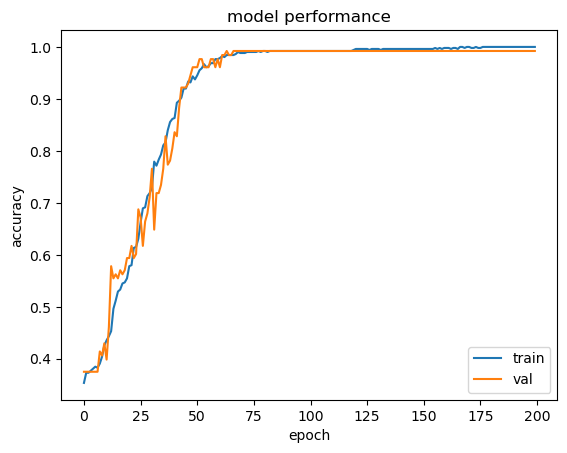

In [129]:
# summarize history for accuracy
plt.plot(history.history['sparse_categorical_accuracy'])
plt.plot(history.history['val_sparse_categorical_accuracy'])
plt.title('model performance')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='lower right')
plt.show()

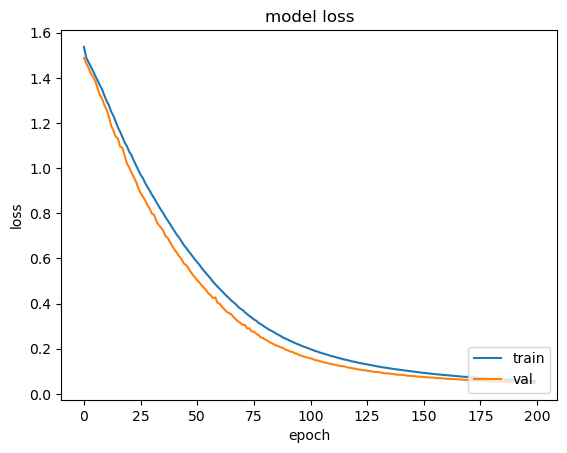

In [130]:
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='lower right')
plt.show()

In [131]:
label_encoder = LabelEncoder()
label_encoder.fit(y)
y_encoded = label_encoder.transform(y)

In [132]:
nclasses = len(np.unique(y_train))  # Assuming y_train is your training labels

In [133]:
labels = label_encoder.classes_  # Array of original class labels
classes = np.unique(y_encoded)   # Unique encoded class labels
nclasses = classes.shape[0]      # Number of unique classes

In [134]:
# Evaluate the model on the test data
loss, accuracy = model.evaluate(X_test, y_test)

print(f'Test Loss: {loss:.4f}')
print(f'Test Accuracy: {accuracy:.4f}')

6/6 [==============================] - 0s 5ms/step - loss: 0.0798 - sparse_categorical_accuracy: 0.9876
Test Loss: 0.0798
Test Accuracy: 0.9876


### Observations:
As we can see the model performance could be much better, I belive by switching to an Adam Optimizer a lot of these inconsistencies will be solved. 

## Neural network with Adam Optimizer

In [135]:
tf.keras.backend.clear_session()

In [136]:
#Defining the model
model = Sequential()

#Hidden layer 1
model.add(Dense(40, input_dim=X_train.shape[1], activation='relu'))

#Hidden layer 2
model.add(Dense(20, activation='relu'))

#Output layer
model.add(Dense(nclasses, activation='softmax'))

#Define optimizer and learning rate. We will use Adam optimizer
opt_adam = keras.optimizers.Adam(learning_rate=0.001)

model.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(), optimizer=opt_adam, metrics=[keras.metrics.SparseCategoricalAccuracy()])

In [137]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 40)                320040    
                                                                 
 dense_1 (Dense)             (None, 20)                820       
                                                                 
 dense_2 (Dense)             (None, 5)                 105       
                                                                 
Total params: 320965 (1.22 MB)
Trainable params: 320965 (1.22 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [138]:
#Fit the model to the training data
history = model.fit(X_train, y_train, validation_data=(X_val, y_val), batch_size=32,epochs=200, verbose=1)

Epoch 1/200
16/16 [==============================] - 1s 21ms/step - loss: 1.5570 - sparse_categorical_accuracy: 0.3867 - val_loss: 1.1641 - val_sparse_categorical_accuracy: 0.5391
Epoch 2/200
16/16 [==============================] - 0s 5ms/step - loss: 0.9621 - sparse_categorical_accuracy: 0.6934 - val_loss: 0.7835 - val_sparse_categorical_accuracy: 0.6797
Epoch 3/200
16/16 [==============================] - 0s 4ms/step - loss: 0.6885 - sparse_categorical_accuracy: 0.7656 - val_loss: 0.5025 - val_sparse_categorical_accuracy: 0.9609
Epoch 4/200
16/16 [==============================] - 0s 4ms/step - loss: 0.5037 - sparse_categorical_accuracy: 0.9062 - val_loss: 0.3415 - val_sparse_categorical_accuracy: 0.9922
Epoch 5/200
16/16 [==============================] - 0s 4ms/step - loss: 0.3430 - sparse_categorical_accuracy: 0.9570 - val_loss: 0.2321 - val_sparse_categorical_accuracy: 0.9844
Epoch 6/200
16/16 [==============================] - 0s 5ms/step - loss: 0.2217 - sparse_categorical_acc

In [139]:
#Now we will print the predictions for the first 20 samples in the test set
for index,entry in enumerate(predictions[0:20,:]):
    print('predicted:%d ,actual:%d'%(np.argmax(entry),y_test[index]))

predicted:2 ,actual:2
predicted:3 ,actual:3
predicted:0 ,actual:0
predicted:0 ,actual:0
predicted:3 ,actual:3
predicted:0 ,actual:0
predicted:1 ,actual:1
predicted:2 ,actual:2
predicted:2 ,actual:2
predicted:0 ,actual:0
predicted:0 ,actual:0
predicted:3 ,actual:3
predicted:1 ,actual:1
predicted:2 ,actual:2
predicted:0 ,actual:0
predicted:4 ,actual:4
predicted:4 ,actual:4
predicted:0 ,actual:0
predicted:3 ,actual:3
predicted:0 ,actual:0


As we can see that the predicted and actual data are all the same therefore this neural network is work really well. 

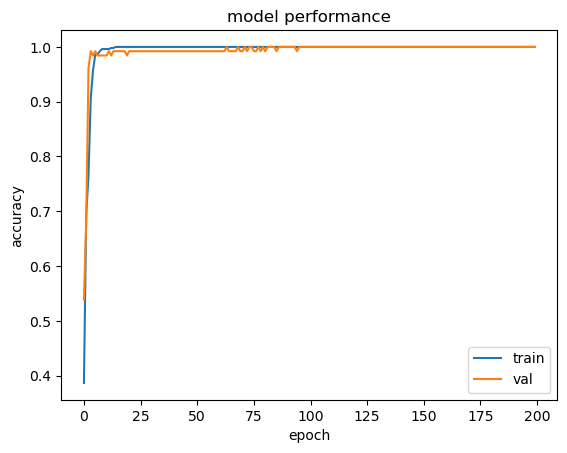

In [140]:
# summarize history for accuracy
plt.plot(history.history['sparse_categorical_accuracy'])
plt.plot(history.history['val_sparse_categorical_accuracy'])
plt.title('model performance')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='lower right')
plt.show()

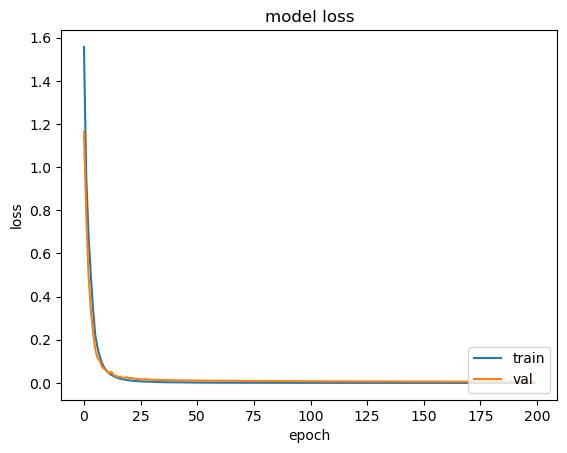

In [141]:
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='lower right')
plt.show()

In [142]:
# Evaluate the model on the test data
loss, accuracy = model.evaluate(X_test, y_test)

print(f'Test Loss: {loss:.4f}')
print(f'Test Accuracy: {accuracy:.4f}')

6/6 [==============================] - 0s 2ms/step - loss: 9.1498e-04 - sparse_categorical_accuracy: 1.0000
Test Loss: 0.0009
Test Accuracy: 1.0000


## Conclusion:

This project involved training a neural network to perform classification tasks using two different optimizers: Adam and SGD (Stochastic Gradient Descent). The architecture of the neural network was consistent across both experiments, allowing for a direct comparison of the optimizer performance. The results indicate that the model trained with the Adam optimizer outperformed the model trained with the SGD optimizer in terms of both loss and accuracy.


### Prediction Consistency:
Both models showed consistent predictions aligning closely with the actual labels, but the Adam optimizer achieved this with higher precision.

### Conclusion on Model Performance
The model trained with the Adam optimizer is clearly better than the model trained with the SGD optimizer. The Adam optimizer led to a higher test accuracy and a significantly lower test loss, suggesting that it is more effective in optimizing the neural network for this particular classification task.

### Areas for Further Improvement
- Hyperparameter Tuning:
Further tuning of hyperparameters such as learning rate, batch size, and number of epochs could potentially enhance the performance of both models.

- Regularization Techniques:
Incorporating regularization techniques like dropout, L2 regularization, or early stopping might help in preventing overfitting and improving generalization.


- Optimizer Variants:
Experimenting with other optimizers or hybrid optimization techniques might yield better results, especially for specific datasets or tasks.

- Model Architecture:
Exploring different model architectures, including deeper networks or different layer configurations, could lead to performance improvements.

In conclusion, while the Adam optimizer proved superior in this project, further experimentation and optimization can help in achieving even better results and potentially discovering new insights.